<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data 
    <br>
    (Exploratory Data Analysis)
    </h1>
</center>

## **Deskripsi**

Pada kompetisi ini, peserta diminta untuk memprediksi **< label >**. Data yang diberikan adalah : 
* **< feature 1 >** : **< feature1_description >**
* **< feature 2 >** : **< feature2_description >**
* ...

## **Library Import**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [3]:
data_path = './data'

**Train**

In [ ]:
# TODO: define initial dataframes
initial_df = pd.read_csv(f'{data_path}/EV_data.csv')
# initial_df = initial_df.reindex(sorted(initial_df.columns), axis=1)
# initial_labels_df = pd.read_csv(f'{data_path}/train_labels.csv')

# initial_df = pd.merge(initial_features_df, initial_labels_df, left_index=True, right_index=True)
# -----------------------------------

initial_df 

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3375,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2375,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2500,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.3375,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0


**Test**

In [8]:
# # TODO: define test dataframe
# test_features_df = pd.read_csv(f'{data_path}/test.csv')

# submisssion_ids = test_features_df['PassengerId']

# # test_features_df = test_features_df.drop(columns=['PassengerId'])
# # -------------------------------------

# test_features_df = test_features_df.reindex(sorted(test_features_df.columns), axis=1)

# test_features_df

**Define Target and Features**

In [26]:
# TODO: define which columns are target labels
label = 'label'
# -----------------------------------
# TODO: define which columns are categorical and which are numerical features
categorical_features = sorted(['id'])

# get all columns with float64 and int64 data types
numerical_features = initial_df.select_dtypes(include=['float64']).columns


# -----------------------------------


## **Exploratory Data Analysis**

**Informasi**

In [27]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   read_date    4048 non-null   object 
 1   interval_1   4048 non-null   float64
 2   interval_2   4048 non-null   float64
 3   interval_3   4048 non-null   float64
 4   interval_4   4048 non-null   float64
 5   interval_5   4048 non-null   float64
 6   interval_6   4048 non-null   float64
 7   interval_7   4048 non-null   float64
 8   interval_8   4048 non-null   float64
 9   interval_9   4048 non-null   float64
 10  interval_10  4048 non-null   float64
 11  interval_11  4048 non-null   float64
 12  interval_12  4048 non-null   float64
 13  interval_13  4048 non-null   float64
 14  interval_14  4048 non-null   float64
 15  interval_15  4048 non-null   float64
 16  interval_16  4048 non-null   float64
 17  interval_17  4048 non-null   float64
 18  interval_18  4048 non-null   float64
 19  interv

In [28]:
# test_features_df.info()

**Statistik Deskriptif**

In [29]:
desc_stats_initial = initial_df.describe(include="all")
unique_values_initial = initial_df.nunique()
desc_stats_initial.loc['unique'] = unique_values_initial
desc_stats_initial

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
count,4048,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,...,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.00000,4048.000000
unique,92,824.000000,778.000000,749.000000,737.000000,690.000000,697.000000,660.000000,674.000000,666.000000,...,1048.000000,1020.000000,1013.000000,970.000000,944.000000,888.000000,900.000000,848.000000,88.00000,2.000000
top,3/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.344301,0.320546,0.297221,0.276360,0.255266,0.244258,0.250251,0.251163,0.255017,...,0.407895,0.402141,0.392470,0.367511,0.359634,0.341184,0.381160,0.365073,44.50000,0.500000
std,NaN,0.698534,0.655992,0.607303,0.554286,0.492384,0.461366,0.598976,0.606699,0.616976,...,0.587563,0.593329,0.607965,0.577805,0.614594,0.622205,0.773924,0.745274,25.40491,0.500062
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,NaN,0.073000,0.072000,0.070000,0.069000,0.066000,0.066000,0.064000,0.066000,0.064000,...,0.121000,0.118700,0.113000,0.105000,0.088000,0.081200,0.077000,0.075000,22.75000,0.000000
50%,NaN,0.137500,0.131200,0.125000,0.125000,0.125000,0.118700,0.118700,0.118700,0.118700,...,0.228500,0.218700,0.206200,0.195000,0.175000,0.156200,0.150000,0.143700,44.50000,0.500000
75%,NaN,0.250000,0.237500,0.225000,0.218700,0.212500,0.208250,0.200000,0.200000,0.206200,...,0.450000,0.431200,0.412500,0.395250,0.352750,0.310250,0.293700,0.266500,66.25000,1.000000


In [30]:
# desc_stats_test = test_features_df.describe(include='all')
# unique_values_test = test_features_df.nunique()
# desc_stats_test.loc['unique'] = unique_values_test
# desc_stats_test

**Jumlah Kolom dan Baris**

In [31]:
initial_df.shape

(4048, 51)

In [32]:
# test_features_df.shape

**Jumlah Missing Value**

In [33]:
def missing_value_stats(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with missing counts and percentages
    missing_data = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing Percentage': missing_percentage.round(2).astype(str) + '%',
    })

    return missing_data

In [34]:
missing_value_stats(initial_df)

,Missing Count,Missing Percentage
read_date,0,0.0%
interval_1,0,0.0%
interval_2,0,0.0%
interval_3,0,0.0%
interval_4,0,0.0%
interval_5,0,0.0%
interval_6,0,0.0%
interval_7,0,0.0%
interval_8,0,0.0%
interval_9,0,0.0%


In [35]:
# missing_value_stats(test_features_df)

### **Univariate Analysis**

In [36]:
def create_count_plots(df: pd.DataFrame, categorical_features: list, label: str = None, title_suffix: str = ''):
    """
    Function to create count plots for categorical features, including null values,
    without modifying the original DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - categorical_features: List of categorical features to plot
    - label: Additional label feature to include in the plots (optional)
    - title_suffix: Suffix for the plot title to differentiate datasets (optional)
    """
    # Total number of plots
    if label:
        num_plots = len(categorical_features + [label])
        features = categorical_features + [label]
    else:
        num_plots = len(categorical_features)
        features = categorical_features
    
    # Calculate the number of rows and columns
    cols = 2  # You can adjust the number of columns as needed
    rows = math.ceil(num_plots / cols)  # Calculate number of rows

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

    # Set the overall figure title (displaying the title_suffix)
    fig.suptitle(f'Jumlah Label untuk Fitur Kategori {title_suffix}', fontsize=20, y=1)

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate through each feature and create count plots
    for i, col in enumerate(features):
        # Replace NaN with 'NaN' for plotting only, without modifying original df
        plot_data = df[col].fillna('NaN')
        
        # Calculate value counts and order the labels
        label_counts = plot_data.value_counts()  # No need for dropna=False since NaNs are now 'NaN'
        label_order = label_counts.index.tolist()

        # Move 'NaN' to the end of the order
        if 'NaN' in label_order:
            label_order.remove('NaN')
            label_order.append('NaN')

        # Create the count plot
        ax = sns.countplot(x=plot_data, order=label_order, ax=axes[i])

        # Set labels only (no individual titles)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Jumlah', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.6)

        # Add percentage and count annotations
        total_count = len(df[col])
        for p in ax.patches:
            count = int(p.get_height())
            percentage = '{:.2f}%'.format(100 * count / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            if y > 0:
                ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='bottom', fontsize=10)

    # Remove any extra subplots if they exist
    if num_plots < len(axes):
        for j in range(num_plots, len(axes)):
            fig.delaxes(axes[j])

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


def plot_classes(df, label):
    """
    This function plots a pie chart for the class distribution in the label column
    and prints the value counts for each class in a nicely formatted way, 
    without modifying the original DataFrame.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    label (str): The column name for the label/class to be plotted.
    """
    # Replace NaN with 'NaN' for plotting only, without modifying the original df
    plot_data = df[label].fillna('NaN')

    # Get the value counts of the label
    class_counts = plot_data.value_counts()  # NaN values are replaced with 'Missing'
    total = len(plot_data)

    # Print the value counts with percentages in a more readable format
    print(f"Value Counts for '{label}':")
    for cls, count in class_counts.items():
        percentage = (count / total) * 100
        print(f"  {cls}: {count} ({percentage:.2f}%)")
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=[f'{cls} ({count})' for cls, count in class_counts.items()],
            autopct=lambda p: f'{p:.2f}%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Class Distribution for '{label}'")
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()


### Categorical Features

In [37]:
print('There are {} categorical variables\n'.format(len(categorical_features)))
print('The categorical variables are: {}\n'.format(categorical_features))

There are 1 categorical variables

The categorical variables are: ['id']



In [38]:
initial_df[categorical_features].head()

,id
0,1
1,1
2,1
3,1
4,1


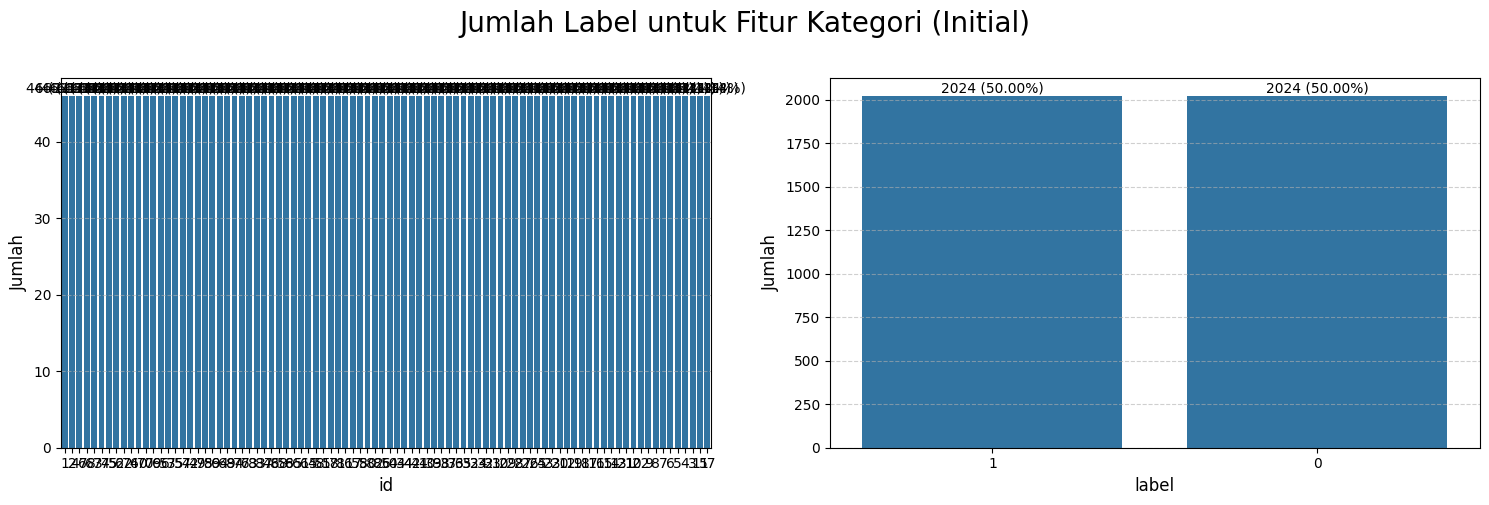

In [39]:
create_count_plots(initial_df, categorical_features, label=label, title_suffix='(Initial)')

In [40]:
# create_count_plots(test_features_df, categorical_features, title_suffix='(Test)')

### Numerical Features

In [41]:
print('There are {} numerical variables\n'.format(len(numerical_features)))
print('The numerical variables are: {}\n'.format(numerical_features))

There are 48 numerical variables

The numerical variables are: Index(['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5',
       'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10',
       'interval_11', 'interval_12', 'interval_13', 'interval_14',
       'interval_15', 'interval_16', 'interval_17', 'interval_18',
       'interval_19', 'interval_20', 'interval_21', 'interval_22',
       'interval_23', 'interval_24', 'interval_25', 'interval_26',
       'interval_27', 'interval_28', 'interval_29', 'interval_30',
       'interval_31', 'interval_32', 'interval_33', 'interval_34',
       'interval_35', 'interval_36', 'interval_37', 'interval_38',
       'interval_39', 'interval_40', 'interval_41', 'interval_42',
       'interval_43', 'interval_44', 'interval_45', 'interval_46',
       'interval_47', 'interval_48'],
      dtype='object')



In [44]:
def plot_histogram_with_kde(data, numerical_features, title, kde=True, label=None):
    """
    Fungsi untuk memplot histogram dan kde menggunakan sns.histplot
    Args:
    - data: DataFrame yang berisi data
    - numerical_features: Daftar nama fitur numerik yang ingin diplot
    - title: Judul dari plot

    Output:
    - Plot histogram dengan kde untuk setiap fitur numerik
    """

    if label:
        numerical_features = numerical_features.copy()
        numerical_features.append(label)

    plt.figure(figsize=(20, 40))
    
    # Looping untuk setiap fitur numerik
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(16, 3, i)  # Mengatur layout menjadi (7, 2)
        sns.histplot(data[feature], kde=kde, bins=20)
        plt.title(f'Histogram of {feature}')
        plt.grid(True)
    
    plt.suptitle(title, fontsize=20, y=0.99)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

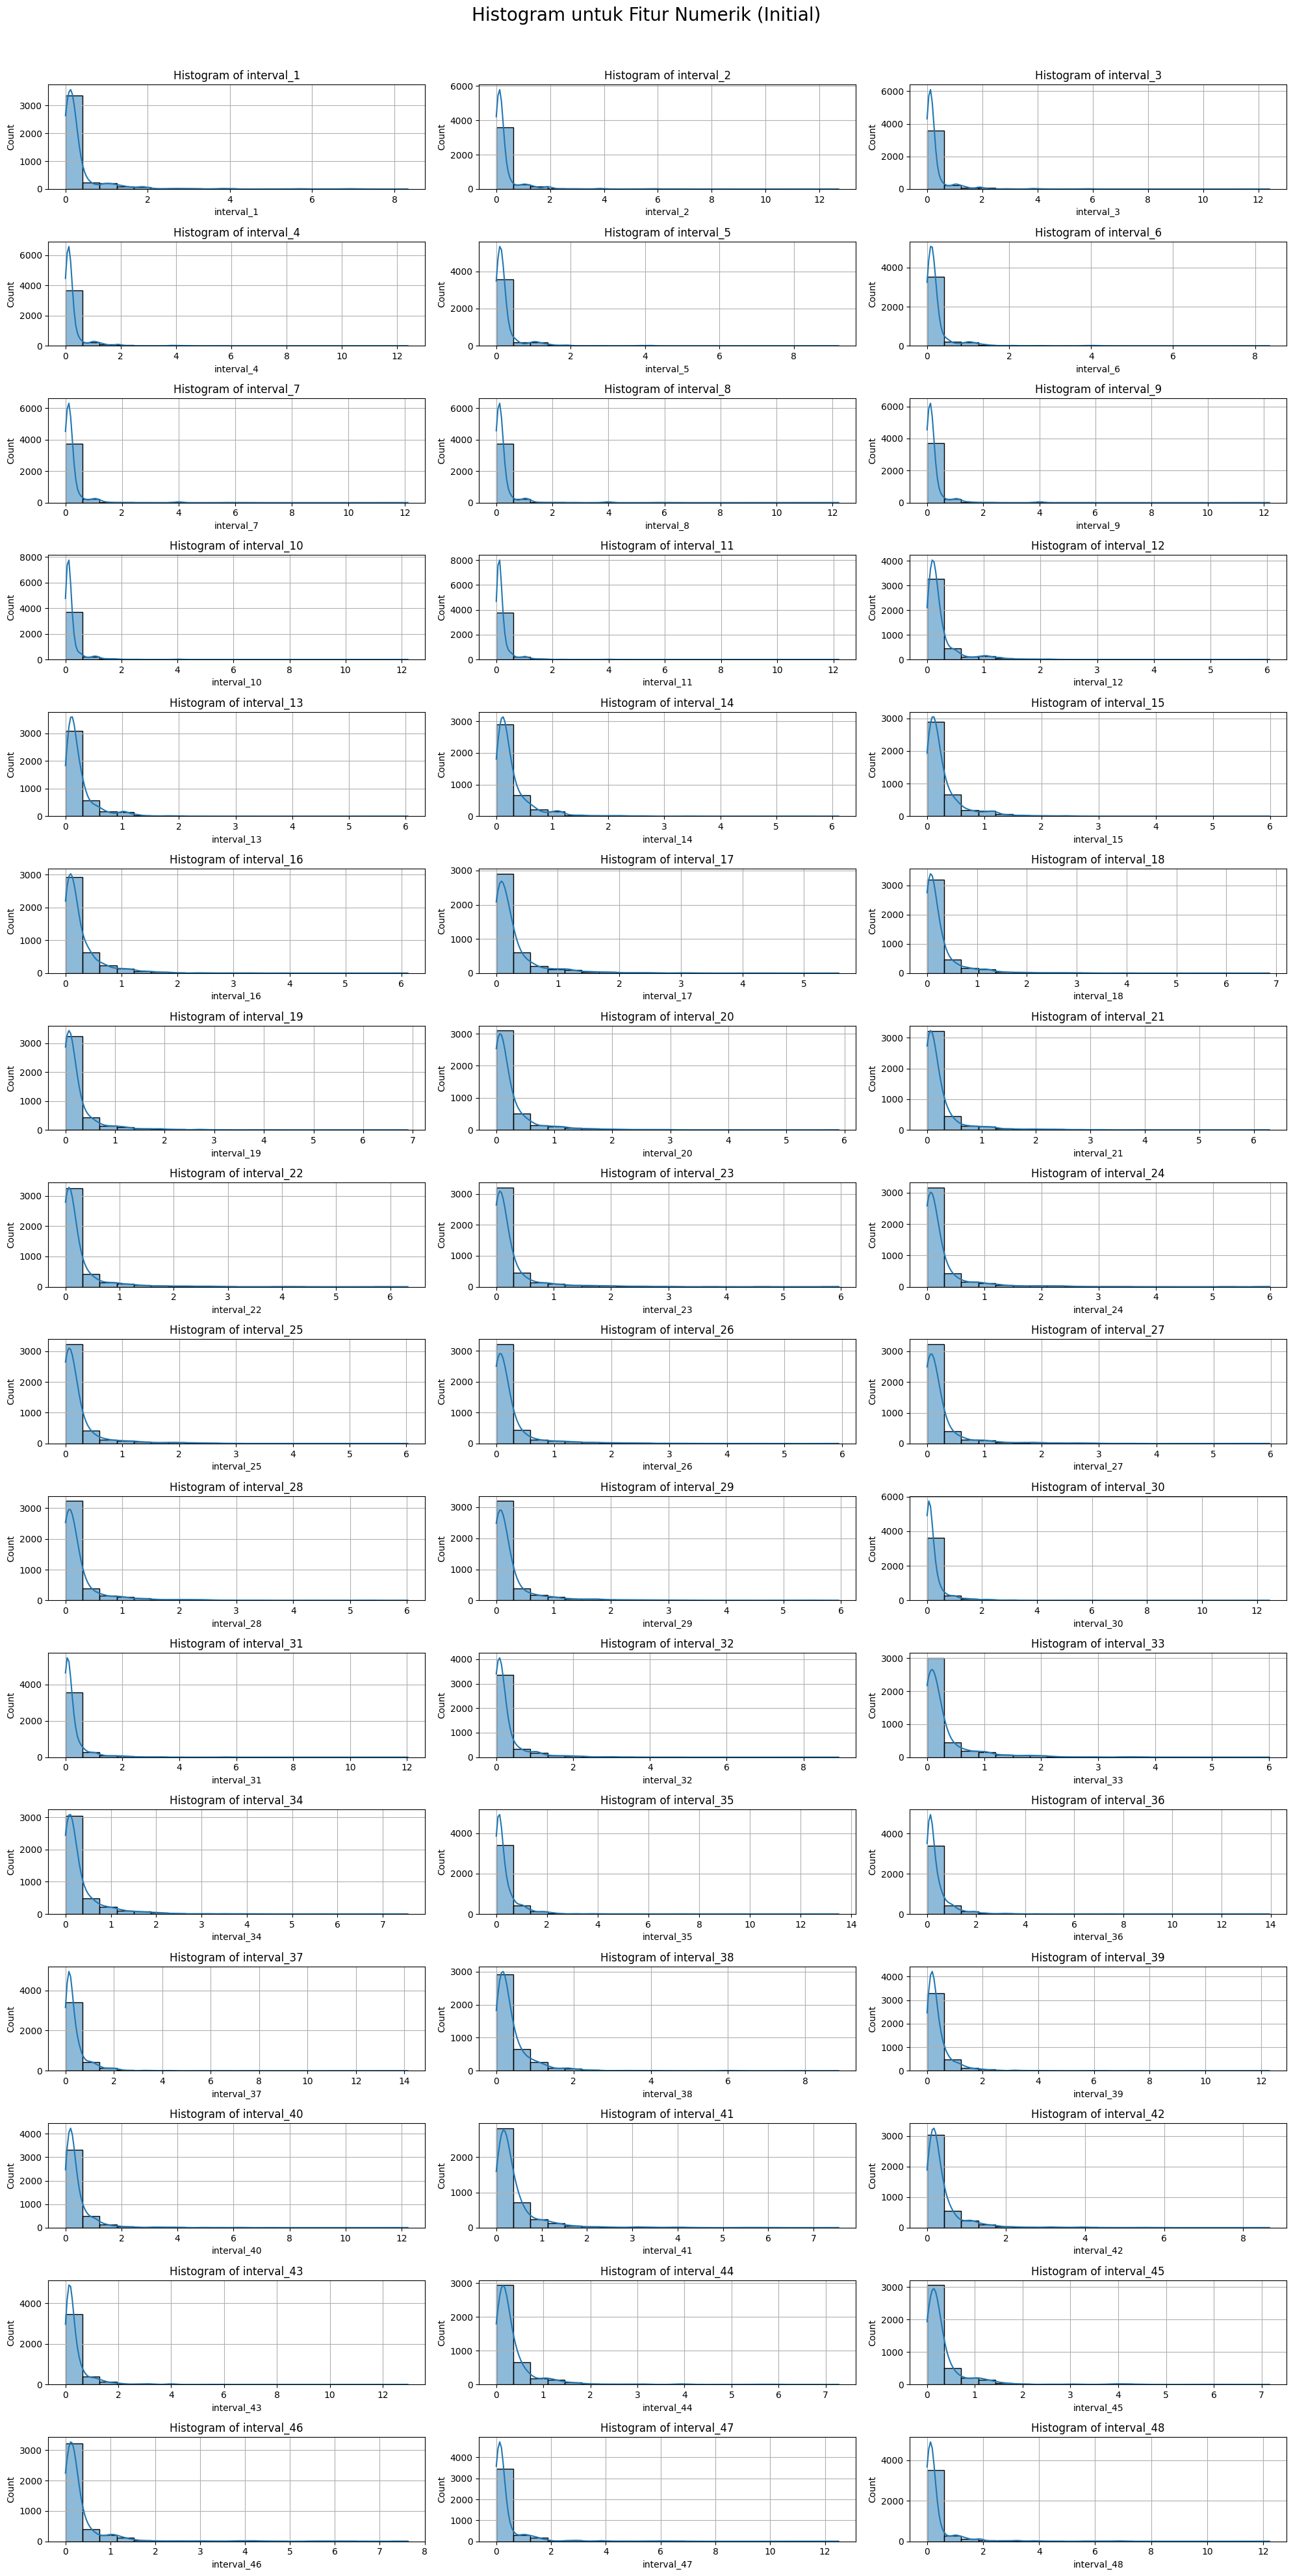

In [45]:
plot_histogram_with_kde(initial_df, numerical_features, 'Histogram untuk Fitur Numerik (Initial)')

In [46]:
# plot_histogram_with_kde(test_features_df, numerical_features, 'Histogram untuk Fitur Numerik (Test)')

### **Multivariate Analysis**

### Categorical Features

In [47]:
def create_combined_count_plots(df, categorical_features, hue=None, title_suffix=''):
    """
    Function to create count plots for categorical features in a combined figure.

    Parameters:
    - df: DataFrame containing the data
    - categorical_features: List of categorical features to plot
    - hue: Optional column to use for color coding
    - title_suffix: Suffix for the plot title
    """
    # Total number of plots
    num_plots = len(categorical_features)
    
    # Calculate the number of rows and columns for subplots
    cols = 2  # You can adjust the number of columns as needed
    rows = math.ceil(num_plots / cols)  # Calculate number of rows
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
    
    # Add a single title at the top of the figure
    fig.suptitle(f'Jumlah Label Berdasarkan Fitur Kategori {title_suffix}', fontsize=20, y=1)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate through each categorical feature and create a count plot
    for i, col in enumerate(categorical_features):
        ax = sns.countplot(x=col, hue=hue, data=df, ax=axes[i])
        
        # Set labels for each subplot (no individual titles)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Jumlah', fontsize=12)
        
        # Add percentage annotations
        total_count = len(df[col])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()

            if y > 0:
                # Annotate with a buffer and rotation set to vertical
                ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, 
                            rotation=90, xytext=(0, 5), textcoords='offset points')

    # Remove any extra subplots if they exist
    if num_plots < len(axes):
        for j in range(num_plots, len(axes)):
            fig.delaxes(axes[j])

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust the layout to fit the suptitle
    plt.show()

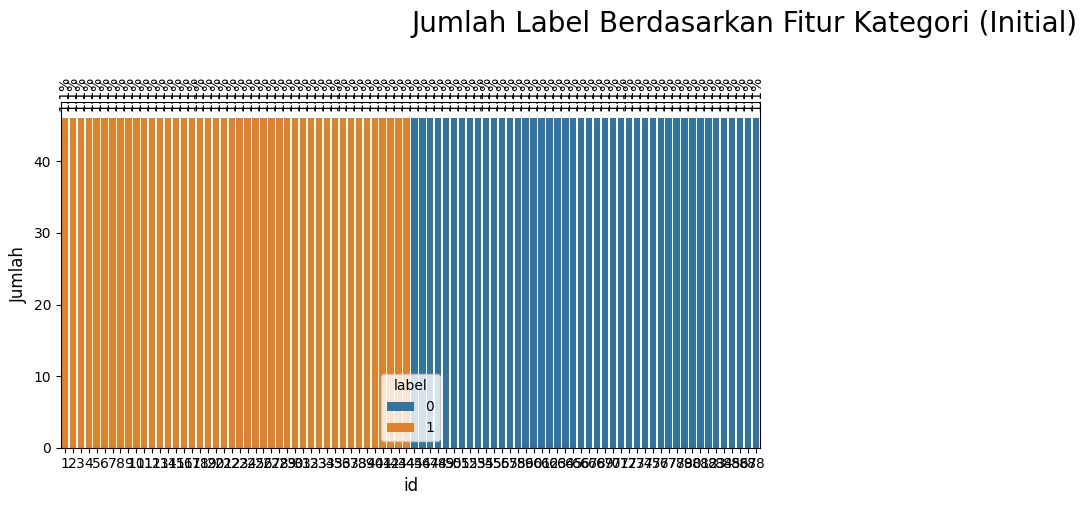

In [48]:
create_combined_count_plots(initial_df, categorical_features, hue=label, title_suffix='(Initial)')

### Numerical Features

In [49]:
def plot_correlation_heatmap(df, numerical_features, title_suffix='', label=None):
    """
    Function to generate a heatmap of the correlation matrix for numerical features.
    
    Parameters:
    - df: DataFrame containing the data.
    - numerical_features: List of numerical feature names to include in the correlation.
    - title: Title of the heatmap plot.
    - label: Optional label column to include in the correlation.
    """

    if label:
        numerical_features = numerical_features.copy()
        numerical_features.append(label)

    plt.figure(figsize=(10, 8))
    
    # Select the numerical columns and calculate the correlation matrix
    numerical_columns = df[numerical_features]
    correlation_matrix = numerical_columns.corr().round(2)
    
    # Create the heatmap
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
    
    # Set the title
    plt.title(f'Korelasi antar Fitur Numerik {title_suffix}', fontsize=16, pad=24)
    
    # Display the plot
    plt.show()

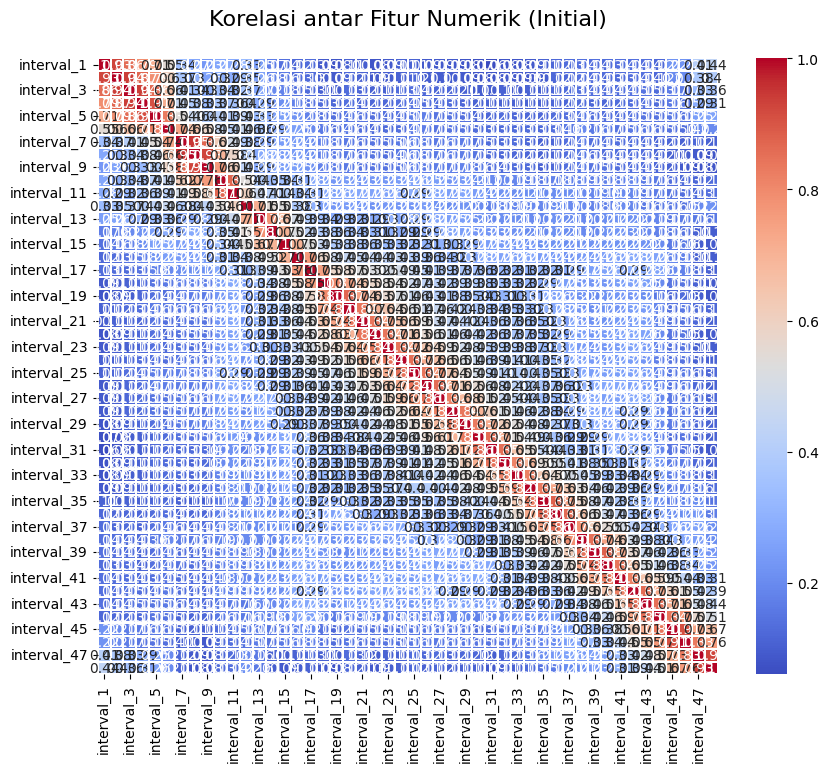

In [50]:
plot_correlation_heatmap(initial_df, numerical_features, '(Initial)')

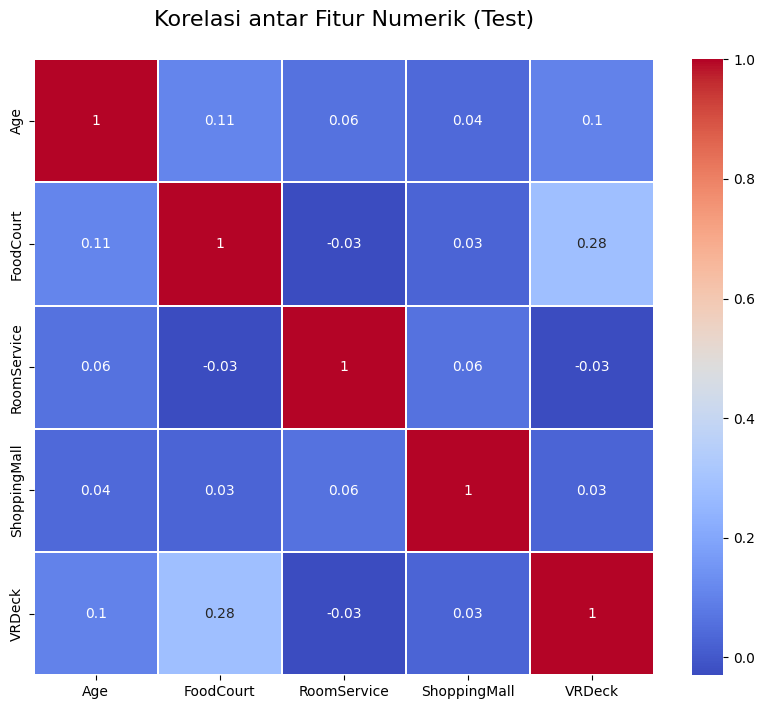

In [ ]:
# plot_correlation_heatmap(test_features_df, numerical_features, '(Test)')